### Checking roles of enron users

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
roles=pd.read_csv('../data/edo_enron-custodians-data.tsv', header=None, names=['user_id','email','name', 'role'], delimiter='\t')
roles=roles.fillna('Regular employee')

In [3]:
roles

user_id                       email                      name  \
0           allen-p      philip.allen@enron.com              Philip Allen   
1          arnold-j       john.arnold@enron.com               John Arnold   
2           arora-h    harpreet.arora@enron.com            Harpreet Arora   
3          badeer-r     robert.badeer@enron.com             Robert Badeer   
4          bailey-s      susan.bailey@enron.com              Susan Bailey   
5            bass-e         eric.bass@enron.com                 Eric Bass   
6        baughman-d      don.baughman@enron.com              Don Baughman   
7            beck-s        sally.beck@enron.com                Sally Beck   
8          benson-r     robert.benson@enron.com             Robert Benson   
9           blair-l        lynn.blair@enron.com                Lynn Blair   
10        brawner-s    sandra.brawner@enron.com            Sandra Brawner   
11            buy-r          rick.buy@enron.com                  Rick Buy   
12       campbell-l    larry.campbell@enron.com            Larry Campbell   
13         carson-m       mike.carson@enron.com               Mike Carson   
14           cash-m     michelle.cash@enron.com             Michelle Cash   
15      causholli-m  monika.causholli@enron.com          Monika Causholli   
16         corman-s    shelley.corman@enron.com            Shelley Corman   
17       crandall-s     sean.crandall@enron.com             Sean Crandall   
18         cuilla-m     martin.cuilla@enron.com             Martin Cuilla   
19       dasovich-j     jeff.dasovich@enron.com             Jeff Dasovich   
20          davis-d        dana.davis@enron.com                Dana Davis   
21           dean-c        craig.dean@enron.com                Craig Dean   
22       delainey-d    david.delainey@enron.com            David Delainey   
23        derrick-j     james.derrick@enron.com             James Derrick   
24        dickson-s     stacy.dickson@enron.com             Stacy Dickson   
25         donoho-l      lindy.donoho@enron.com              Lindy Donoho   
26        donohoe-t       tom.donohoe@enron.com               Tom Donohoe   
27        dorland-c     chris.dorland@enron.com             Chris Dorland   
28          ermis-f       frank.ermis@enron.com               Frank Ermis   
29         farmer-d      daren.farmer@enron.com              Daren Farmer   
..              ...                         ...                       ...   
118       slinger-r      ryan.slinger@enron.com              Ryan Slinger   
119         smith-m        matt.smith@enron.com                Matt Smith   
120       solberg-g      geir.solberg@enron.com              Geir Solberg   
121         south-s      steven.south@enron.com           Steven P. South   
122         staab-t     theresa.staab@enron.com             Theresa Staab   
123       stclair-c     carol.stclair@enron.com           Carol St. Clair   
124       steffes-j     james.steffes@enron.com             James Steffes   
125  stepenovitch-j  joe.stepenovitch@enron.com          Joe Stepenovitch   
126       stokley-c     chris.stokley@enron.com             Chris Stokley   
127        storey-g   geoffery.storey@enron.com           Geoffery Storey   
128         sturm-f    fletcher.sturm@enron.com            Fletcher Sturm   
129      swerzbin-m     mike.swerzbin@enron.com             Mike Swerzbin   
130         symes-k        kate.symes@enron.com                Kate Symes   
131        taylor-m       mark.taylor@enron.com               Mark Taylor   
132         tholt-j        jane.tholt@enron.com                Jane Tholt   
133        thomas-p       paul.thomas@enron.com               Paul Thomas   
134      townsend-j     judy.townsend@enron.com             Judy Townsend   
135      tycholiz-b    barry.tycholiz@enron.com            Barry Tycholiz   
136          ward-k          kim.ward@enron.com                  Kim Ward   
137        watson-k   kimberly.watson@enron.com           Kimberly Watson   
138     

#### Check roles distribution

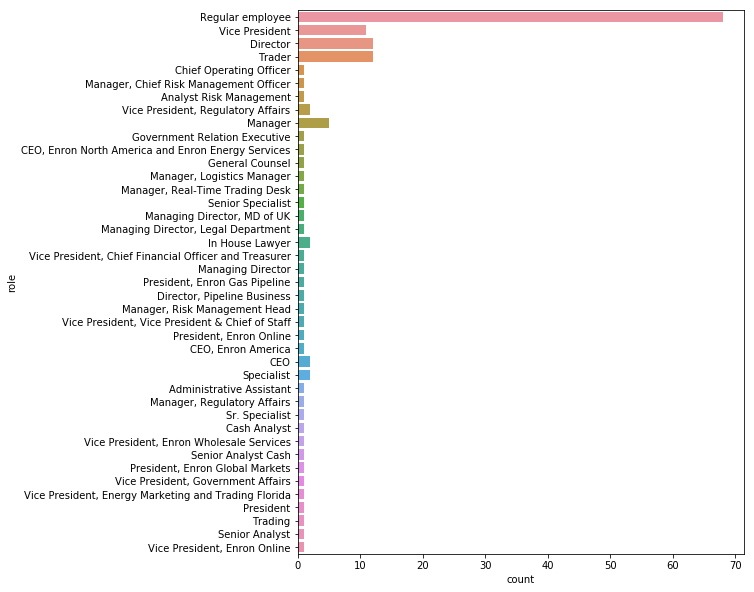

In [4]:
plt.figure(figsize=(8, 10))
sns.countplot(y='role', data=roles)

### Enron emails

In [6]:
email_df= pd.read_csv('../data/cleaned_enron_mail.csv')
email_df.head()

date                         from  \
0  1980-01-01 00:00:00   jeffrey.shankman@enron.com   
1  1980-01-01 00:00:00      jeff.dasovich@enron.com   
2  1980-01-01 00:00:00        harry.arora@enron.com   
3  1980-01-01 00:00:00  debra.perlingiere@enron.com   
4  1980-01-01 00:00:00  debra.perlingiere@enron.com   

                                to  \
0            david.oxley@enron.com   
1         ginger.dernehl@enron.com   
2          pushkar.shahi@enron.com   
3           hissongm@dteenergy.com   
4  bernadette.dowling@conectiv.com   

                                           subject  \
0                                              NaN   
1                    Re: Washington, DC Dept. Mtg.   
2                                  US fixed income   
3  Re: DTE Energy Trading--Spec Prov to GISB; GISB   
4    Re: Contract for Conectiv Energy Supply, Inc.   

                                             message  \
0  Weather:  Mark Tawney--Director\n\n Steven Vu ...   
1  Hi.  I'm sorry for not responding.  I'm actual...   
2  Pushkar\n\nI quickly plotted the short and the...   
3  Marcia,\n\nThank you for your e-mail.  Concern...   
4  Bernadette:\n\nIn response to your reguest for...   

                                 file  
0  shankman-j/discussion_threads/298.  
1       dasovich-j/all_documents/689.  
2      arora-h/discussion_threads/19.  
3   perlingiere-d/all_documents/2247.  
4      perlingiere-d/all_documents/3.

#### Drop non insiders data

In [7]:
insiders_mail = email_df[email_df['from'].isin(roles.email) & 
                         email_df['to'].isin(roles.email)]

insiders_mail.reset_index(drop=True, inplace=True)
insiders_mail.tail()

date                     from                       to  \
7399  2002-06-12 16:21:36    kevin.hyatt@enron.com  chris.germany@enron.com   
7400  2002-06-19 21:49:43  chris.germany@enron.com  chris.germany@enron.com   
7401  2002-06-21 16:10:24  chris.germany@enron.com  chris.germany@enron.com   
7402  2002-06-21 16:15:43  chris.germany@enron.com  chris.germany@enron.com   
7403  2002-06-21 22:40:19  chris.germany@enron.com  chris.germany@enron.com   

                                         subject  \
7399                                 RE: Job Ops   
7400                                         NaN   
7401  Apache/Cinery volumes for July 2002 on TXU   
7402        Ponderosa Pines volume for July 2002   
7403                    RE: DOM Files, CNR Files   

                                                message  \
7399  same posting for both openings\n\n -----Origin...   
7400  Date\tDaily Withdrawal\tDaily Injection\t\nJul...   
7401  Jackie\n\nFor July  2002, Ponderosa Pines is e...   
7402  Jeff\n\nFor July 2002, Ponderosa Pines is elec...   
7403  Sorry about that.  I found it - my fault.  I'm...   

                                          file  
7399                     germany-c/personal/1.  
7400                       germany-c/inbox/33.  
7401  germany-c/bankrupt/cleburne_lone_star/5.  
7402  germany-c/bankrupt/cleburne_lone_star/4.  
7403                       germany-c/inbox/22.

#### Drop self loops

In [8]:
insiders_mail = insiders_mail[insiders_mail['from'] != insiders_mail['to']]

insiders_mail.reset_index(drop=True, inplace=True)
insiders_mail.tail()

date                     from                         to  \
6812  2002-05-02 21:12:13      joe.parks@enron.com    chris.germany@enron.com   
6813  2002-05-02 21:12:54  chris.germany@enron.com        joe.parks@enron.com   
6814  2002-06-10 18:28:51  chris.germany@enron.com  sara.shackleton@enron.com   
6815  2002-06-12 16:20:33  chris.germany@enron.com      kevin.hyatt@enron.com   
6816  2002-06-12 16:21:36    kevin.hyatt@enron.com    chris.germany@enron.com   

           subject                                            message  \
6812  RE: Activity  thanks\n\n -----Original Message-----\nFrom: \...   
6813  RE: Activity  But I'm going to try and keep it down to minim...   
6814     NNG Deals  I work with Louis Dicarlo in Ed McMicahels gro...   
6815       Job Ops  I see job #1154 (Origination - Wholesale) on t...   
6816   RE: Job Ops  same posting for both openings\n\n -----Origin...   

                           file  
6812     parks-j/sent_items/78.  
6813  germany-c/sent_items/201.  
6814        germany-c/inbox/49.  
6815   germany-c/sent_items/74.  
6816      germany-c/personal/1.

In [9]:
insiders_mail.to_csv('../data/enron-mails-insiders-only.csv')